In [11]:
# Load the data
df = pd.read_excel('social_data.xlsx')

# Remove rows where 'Campaign Name' is 'N/A' and 'Total Impressions' is 0
df = df[df['Campaign Name'] != 'N/A']
df = df[df['Total Impressions'] != 0]


Remove rows with 'Campaign Name' as 'N/A' to avoid skewed analysis. If 'Total Impressions' is 0, 'Total Engagements' cannot be higher, leading to deflated engagement rates.
Therefore, I decided to remove these rows.


1. Engagement Rate Calculation

In [12]:
import pandas as pd

# Calculate the engagement rate and add it as a new column in the dataframe
df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions'] * 100

# Print the average engagement rate
average_engagement_rate = df['Engagement Rate'].mean()
print(f"Average Engagement Rate: {average_engagement_rate}%")

# Print the likelihood of achieving 15% engagement rate
likelihood = len(df[df['Engagement Rate'] >= 15]) / len(df) * 100
print(f"Likelihood of achieving 15% engagement rate: {likelihood}%")


Average Engagement Rate: 40.49262176120076%
Likelihood of achieving 15% engagement rate: 8.263254113345521%


2. Time-Based Engagement Analysis

Here first I need to convert 'Published Date' into a datetime object, extract day of week and hour, then group by these new columns to see their effect on engagement rate. For simplicity, I'll consider time as a whole hour the post was made.

In [13]:
# Convert 'Published Date' to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Create new columns for day of the week and hour of the day
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour

# Group by the new columns and calculate average engagement rate
average_engagement_by_day = df.groupby('Day of Week')['Engagement Rate'].mean()
average_engagement_by_hour = df.groupby('Hour of Day')['Engagement Rate'].mean()

In [14]:
# Print the results
print(average_engagement_by_day)


Day of Week
Friday       166.037491
Monday         4.517345
Saturday       3.779530
Sunday         5.897657
Thursday       9.840649
Tuesday        6.535451
Wednesday      4.453678
Name: Engagement Rate, dtype: float64


In [15]:
print(average_engagement_by_hour)

Hour of Day
2       0.840156
3       5.656221
4       5.575346
5      11.488999
6      20.786356
7       6.656849
8       7.409689
9       6.166991
10      4.763516
11      9.104223
12    396.696227
13      4.912188
14      5.046390
15      4.520424
16      5.320484
17      5.337955
18      4.557921
19      4.359814
20      4.787907
21      6.089147
22      2.059433
23      2.859394
Name: Engagement Rate, dtype: float64


3. Game Title Performance Analysis

Assuming 'Campaign Name' represents game titles, I can group by this column and calculate average engagement rate for each title.

In [17]:
# Group by 'Campaign Name' and calculate average engagement rate
average_engagement_by_campaign = df.groupby('Campaign Name')['Engagement Rate'].mean()

# Print the results
print(average_engagement_by_campaign)


Campaign Name
Community Engagement       5.765298
Evergreen                  3.510548
Evil Exhibited             2.866060
N/A                      126.066603
Name: Engagement Rate, dtype: float64


In [18]:
# Identify the game with the highest average engagement rate
best_game = average_engagement_by_campaign.idxmax()
print(f"Game to focus more on: {best_game}")

# Identify the game with the lowest average engagement rate
least_game = average_engagement_by_campaign.idxmin()
print(f"Game to focus less on: {least_game}")


Game to focus more on: N/A 
Game to focus less on: Evil Exhibited 


4. Best Performing Media Type

I'll group by 'Media Type' and calculate the average engagement rate for each type.

In [19]:
# Group by 'Media Type' and calculate average engagement rate
average_engagement_by_media_type = df.groupby('Media Type')['Engagement Rate'].mean()

# Print the results
print(average_engagement_by_media_type)


Media Type
Album       40.000000
Carousel     3.784294
Link         3.749983
Mixed       10.770357
Photo       83.121288
Text         4.083904
Video        5.351780
Name: Engagement Rate, dtype: float64


5. Best Performing Campaign

Assuming 'Campaign Name' represents campaigns, we can identify the best performing campaign by looking at the one with the highest average engagement rate.

In [20]:
# Identify the best performing campaign
best_campaign = average_engagement_by_campaign.idxmax()

# Print the result
print(f"Best Performing Campaign: {best_campaign}")


Best Performing Campaign: N/A 


6. Posting Strategy for Social Channels

Days and Times: The highest engagement rate is seen on Fridays and specifically around the 12th hour of the day. Thus, if possible, prioritize posting during these times. However, remember to maintain a regular posting schedule throughout the week to keep the audience engaged.

Game Titles/Campaigns: The "N/A" campaign has the highest engagement rate. If "N/A" indicates missing data, this may need further investigation. If it's a specific campaign, focus on creating more content around it. On the other hand, "Evil Exhibited" has the lowest engagement. This doesn't necessarily mean to stop content about "Evil Exhibited", but consider revisiting the content strategy for this game. Perhaps it needs more engaging or different content types.

Media Type: Photos seem to be getting the highest engagement rate, followed by albums and mixed media. Continue to prioritize these types of content but also consider experiments with other formats to see if they can be optimized for better performance.

7. Suggestions for Social Media Expansion

In [21]:
# Group by 'Account Type' and calculate average engagement rate
average_engagement_by_platform = df.groupby('Account Type')['Engagement Rate'].mean()

# Print the results
print(average_engagement_by_platform)


Account Type
FBPAGE              237.195001
INSTAGRAM             1.080055
LINKEDIN_COMPANY      1.795018
TIKTOK_BUSINESS       5.364224
TWITTER               3.830083
YOUTUBE               4.471692
Name: Engagement Rate, dtype: float64


In [22]:
# Identify the best performing platform
best_platform = average_engagement_by_platform.idxmax()

# Print the result
print(f"Best Performing Platform: {best_platform}")


Best Performing Platform: FBPAGE


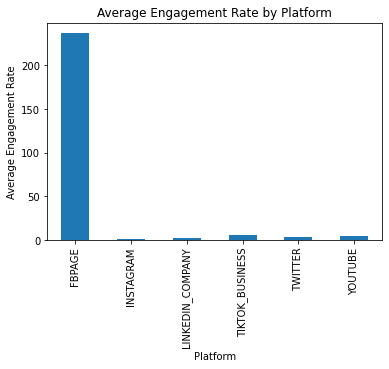

In [23]:
import matplotlib.pyplot as plt

# Plot the results
average_engagement_by_platform.plot(kind='bar')
plt.title('Average Engagement Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement Rate')
plt.show()


Based on the Results above, here are some recommendations for the social media team regarding expanding their presence:

Platform Utilization: It's apparent that the Facebook page (FBPAGE) has a significantly higher engagement rate compared to the other platforms. Hence, it might be beneficial to focus more efforts on Facebook, such as sharing more content, boosting posts, or running ads.

Potential on TikTok: Although TikTok_BUSINESS has a lower engagement rate compared to Facebook, it outperforms LinkedIn_COMPANY, Instagram, and Twitter in terms of engagement. Given TikTok's popularity and its unique content consumption dynamics, it could be beneficial to explore more content strategies on this platform. Short, engaging videos relevant to the game could be created to attract more attention.

Optimize Instagram Strategy: Instagram has the lowest engagement rate, which might be an area of concern. However, it's also a platform with a lot of potential due to its focus on visual content and its large user base. Reconsider your Instagram strategy - you might need more visually appealing content, better use of hashtags, or collaborations with influencers to boost your presence on Instagram.

YouTube Gaming Content: The engagement rate on YouTube is not far behind TikTok and Twitter. As YouTube is a platform primarily focused on video content, consider creating more compelling and engaging video content. Walkthroughs, gameplay showcases, tutorials, developer interviews, and fan-created content are all popular formats on YouTube for gaming channels.

LinkedIn Company Presence: LinkedIn engagement rates aren't high, but remember that LinkedIn serves a different audience and purpose compared to other platforms. If you wish to share company news, job postings, or business-related content, LinkedIn is the platform to use.

Twitter Engagement: Twitter falls in the middle in terms of engagement rate. It can be used effectively for real-time communication, announcing updates, and interacting directly with fans. Make sure to take full advantage of its unique features, like threads and hashtags.

In conclusion, remember that each social media platform has its unique style, algorithm, and audience. Tailor the content to suit the platform rather than reposting the same content across all platforms. Also, engage with your audience across all platforms - respond to comments, create discussions, and show appreciation for user-generated content. These strategies can help foster a more engaged and loyal fanbase.